#### This project is about predicting state of the body more specifically whether in walking state or running state. This Human Activity Recognition problem. The data is extracted from the the sensors of smart watch. It has acceleration and gyro data of x,y and z axes. The csv file is directly provided by Datamites.

## 1.  Importing Libraries and loading dataset

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sy
from scipy import stats
import time 
import datetime

In [9]:
df = pd.read_csv('walkrun.csv')
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


## 2.  Data cleaning and data processing

In [25]:
df.shape

(88588, 11)

In [57]:
df.activity.value_counts()

1    44365
0    44223
Name: activity, dtype: int64

#### Data set is balanced.

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


#####  No missing data. Also info about datatypes and counts.

##### 2.1 Converting date and time column to datetime column and timestamnp  for arithmatic operation. 

In [59]:
df['datetime'] = df['date']+[' ']+df['time']
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,datetime
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,2017-6-30 13:51:15:847724020
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,2017-6-30 13:51:16:246945023
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,2017-6-30 13:51:16:446233987
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,2017-6-30 13:51:16:646117985
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,2017-6-30 13:51:16:846738994


In [60]:
df.shape

(88588, 12)

In [61]:
df['datetime_obj'] = pd.to_datetime(df.datetime,format="%Y-%m-%d %H:%M:%S:%f")
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,datetime,datetime_obj
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,2017-6-30 13:51:15:847724020,2017-06-30 13:51:15.847724020
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,2017-6-30 13:51:16:246945023,2017-06-30 13:51:16.246945023
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,2017-6-30 13:51:16:446233987,2017-06-30 13:51:16.446233987
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,2017-6-30 13:51:16:646117985,2017-06-30 13:51:16.646117985
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,2017-6-30 13:51:16:846738994,2017-06-30 13:51:16.846738994


In [62]:
df.shape

(88588, 13)

In [63]:
y = []
for i in range(df.shape[0]):
    x = datetime.datetime.timestamp(df.datetime_obj[i])
    y.append(x)
df['timestamp']=y

In [64]:
df.head(2)

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,datetime,datetime_obj,timestamp
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,2017-6-30 13:51:15:847724020,2017-06-30 13:51:15.847724020,1.498811e+09
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,2017-6-30 13:51:16:246945023,2017-06-30 13:51:16.246945023,1.498811e+09


In [65]:
df.shape

(88588, 14)

In [66]:
df.timestamp.nunique()

88588

#### All date time values are uniquely stamped to timestamp

In [67]:
print(df.date[0])
print(df.time[0])
print(df.datetime[0])
print(df.datetime_obj[0])
print(df.timestamp[0])
print(type(df.date[0]))
print(type(df.time[0]))
print(type(df.datetime[3]))
print(type(df.datetime_obj[3]))
print(type(df.timestamp[3]))

2017-6-30
13:51:15:847724020
2017-6-30 13:51:15:847724020
2017-06-30 13:51:15.847724020
1498810875.847724
<class 'str'>
<class 'str'>
<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'numpy.float64'>


In [68]:
pd.DataFrame([type(df.date[0]),type(df.time[0]),type(df.datetime[0]),type(df.datetime_obj[0]),type(df.timestamp[0])],
             [df.date[0],df.time[0],df.datetime[0],df.datetime_obj[0],df.timestamp[0]])

,0
2017-6-30,<class 'str'>
13:51:15:847724020,<class 'str'>
2017-6-30 13:51:15:847724020,<class 'str'>
2017-06-30 13:51:15.847724020,<class 'pandas._libs.tslibs.timestamps.Timesta...
1498810875.847724,<class 'numpy.float64'>


## 3.  Data Visualisation Descriptive Analysis

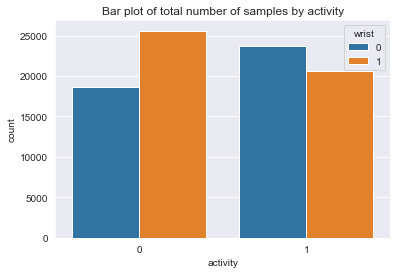

In [69]:
sns.set_style('darkgrid')
sns.countplot(x = 'activity', data = df, hue='wrist')
plt.title('Bar plot of total number of samples by activity')
plt.show()

####  For activity 0 i.e. "Running", less number of samples belongs to left wrist '0' category than right wrist '1'; whereas for for activity 1 "Walking", this difference is minimal. Also, it is evident that almost same number of samples corresponds to both the activity 0 and 1.

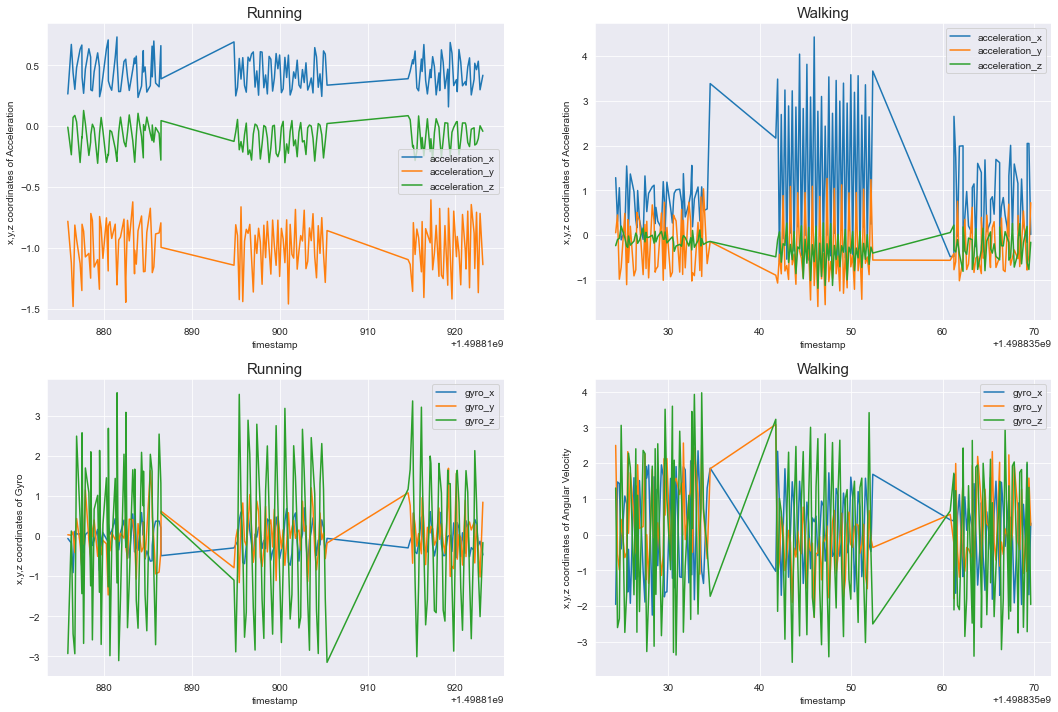

In [70]:
plt.figure(figsize=[18,12])
data = df[df['activity'] == 0][0:150]
plt.subplot(2,2,1)
sns.lineplot(y = 'acceleration_x', x = 'timestamp', data = data)
sns.lineplot(y = 'acceleration_y', x = 'timestamp', data = data)
sns.lineplot(y = 'acceleration_z', x = 'timestamp', data = data)
plt.legend(['acceleration_x', 'acceleration_y', 'acceleration_z'])
plt.ylabel('x,y,z coordinates of Acceleration')
plt.title("Running", fontsize = 15)
data = df[df['activity'] == 1][0:150]
plt.subplot(2,2,2)
sns.lineplot(y = 'acceleration_x', x = 'timestamp', data = data)
sns.lineplot(y = 'acceleration_y', x = 'timestamp', data = data)
sns.lineplot(y = 'acceleration_z', x = 'timestamp', data = data)
plt.legend(['acceleration_x', 'acceleration_y', 'acceleration_z'])
plt.ylabel('x,y,z coordinates of Acceleration')
plt.title("Walking", fontsize = 15)
data = df[df['activity'] == 0][0:150]
plt.subplot(2,2,3)
sns.lineplot(y = 'gyro_x', x = 'timestamp', data = data)
sns.lineplot(y = 'gyro_y', x = 'timestamp', data = data)
sns.lineplot(y = 'gyro_z', x = 'timestamp', data = data)
plt.legend(['gyro_x', 'gyro_y', 'gyro_z'])
plt.ylabel('x,y,z coordinates of Gyro')
plt.title("Running", fontsize = 15)
data = df[df['activity'] == 1][0:150]
plt.subplot(2,2,4)
sns.lineplot(y = 'gyro_x', x = 'timestamp', data = data)
sns.lineplot(y = 'gyro_y', x = 'timestamp', data = data)
sns.lineplot(y = 'gyro_z', x = 'timestamp', data = data)
plt.legend(['gyro_x', 'gyro_y', 'gyro_z'])
plt.ylabel('x,y,z coordinates of Angular Velocity')
plt.title("Walking", fontsize = 15)
plt.show()

###### X, Y, Z coordinates of Acceleration and angular velocity is plotted verses the timestamp. We can see that timestamp is not continuous, it it because all the samples are not collected at once at one-go. Running and Walking activity is performed on different dates at different times. However, all the data is from same user. 

###### Analyzing Running data, shows that,x-coordinates of acceleration is always greater than z-coordinates than y-coordinates. while, this is not true for walking. For Walking, The mean value of x-coordinates is greater than y and z coodinates. Although, the mean value of y and z coordinates of acceleration is almost same, the variance of y-coordinates of acceleration is far greater than z-coordinates. The z-coordinates of acceleration while walking barely changes. X-coordinates varies more than y-coordinates.

###### While analyzing angular velocity data, we can observe that, the variance of z-coordinates is greater than x and y coordinates while performing both activities. It can also be observed that, variance of x and y coordinates of angular velocity while Running has less variance than when walking.

### For simplicity, we have assumed that wearing watch on left or right wrist has no significant impact on our result. Also, the entire dataset corresponds to the same user. Hence, we can drop 'username' and 'wrist' column.

In [71]:
df.drop(columns=['date', 'time', 'username', 'wrist', 'datetime', 'datetime_obj'], axis=1, inplace=True)
df.head()

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,timestamp
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,1.498811e+09
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,1.498811e+09
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,1.498811e+09
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,1.498811e+09
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,1.498811e+09


## 4.  Data Preparation

######  4.1  Changing the sample into subsamples for feding into LSTM model. We have converted our data into subsamples of 50 timesteps. We have total of 6 features after ignoring the 'wrist' column. Now, our dataset is converted into shape of ( no. of subsamples, n_features, time_steps). 

In [72]:
time_steps = 50 
n_features = 6 
stepsize = 10
segments = []
labels = []

for i in range(0,  df.shape[0]- time_steps, stepsize):
    ax = df['acceleration_x'].values[i:i+time_steps]
    ay = df['acceleration_y'].values[i:i+time_steps]
    az = df['acceleration_z'].values[i:i+time_steps]
    gx = df['gyro_x'].values[i:i+time_steps]
    gy = df['gyro_y'].values[i:i+time_steps]
    gz = df['gyro_z'].values[i:i+time_steps]
    label = stats.mode(df['activity'][i: i + 50])[0][0]
    segments.append([ax, ay, az, gx, gy, gz])
    labels.append(label)

In [73]:
print(np.array(segments).shape)
print(np.array(labels).shape)

(8854, 6, 50)
(8854,)


In [74]:
n_subsample = np.array(segments).shape[0]
print('The no of subsample is:', n_subsample)

The no of subsample is: 8854


#### 4.2 Reshaping the data in a form suitable for feeding into LSTM model.

In [75]:
reshaped_segments = np.array(segments).reshape(n_subsample, time_steps, n_features)
reshaped_segments.shape

(8854, 50, 6)

In [76]:
np.array(labels)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### 4.3 One hot encoding for our categorical labels

In [77]:
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

In [78]:
labels.shape

(8854, 2)

In [79]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

#### 4.4 Spliting the data into train-test with the test size of 0.2 and random state of 10.

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size = 0.2, random_state = 10)

In [81]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7083, 50, 6)
(1771, 50, 6)
(7083, 2)
(1771, 2)


## 5. Predictive Analysis

#### 5.1 Importing libraries from Keras

In [82]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, Dropout

#### 5.2 Building LSTM Architcture

In [83]:
model = Sequential()
model.add(Bidirectional(LSTM(100, activation='relu'), input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.5)) 
model.add(Dense(units = 50, activation='relu'))
model.add(Dense(y_train.shape[1], activation = 'softmax'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [84]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 200)               85600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 102       
Total params: 95,752
Trainable params: 95,752
Non-trainable params: 0
_________________________________________________________________


#### 5.3 Training the model

In [85]:
history = model.fit(X_train, y_train, epochs = 50, validation_split = 0.20, batch_size = 1014, verbose = 1)

Epoch 1/50
6/6 [==============================] - 13s 1s/step - loss: 0.2136 - accuracy: 0.6175 - val_loss: 0.1595 - val_accuracy: 0.7177
Epoch 2/50
6/6 [==============================] - 8s 1s/step - loss: 0.1392 - accuracy: 0.8525 - val_loss: 0.0803 - val_accuracy: 0.9986
Epoch 3/50
6/6 [==============================] - 8s 1s/step - loss: 0.0744 - accuracy: 0.9790 - val_loss: 0.0307 - val_accuracy: 0.9817
Epoch 4/50
6/6 [==============================] - 7s 1s/step - loss: 0.0312 - accuracy: 0.9758 - val_loss: 0.0077 - val_accuracy: 0.9986
Epoch 5/50
6/6 [==============================] - 8s 1s/step - loss: 0.0169 - accuracy: 0.9912 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 6/50
6/6 [==============================] - 8s 1s/step - loss: 0.0078 - accuracy: 0.9922 - val_loss: 0.0060 - val_accuracy: 0.9915
Epoch 7/50
6/6 [==============================] - 8s 1s/step - loss: 0.0062 - accuracy: 0.9931 - val_loss: 0.0014 - val_accuracy: 0.9993
Epoch 8/50
6/6 [========================

## 6. Evaluation of model

#### 6.1 Evaluating Train and Validation Accuracy and Loss

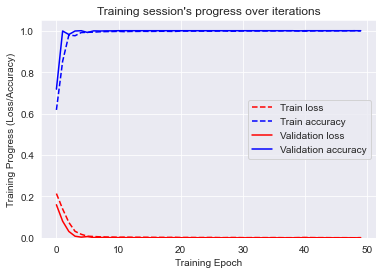

In [86]:
plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history.history['accuracy']), "b--", label = "Train accuracy")
plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
plt.plot(np.array(history.history['val_accuracy']), "b-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='center right')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.show()

In [87]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size = 1014 , verbose = 1)
print("Test Accuracy:", accuracy)
print("Test Loss:", loss)

2/2 [==============================] - 1s 330ms/step - loss: 0.0012 - accuracy: 0.9989
Test Accuracy: 0.9988706707954407
Test Loss: 0.0012139113387092948


#### 6.2 Predcting the values from X_test data

In [88]:
pred = model.predict(X_test).round(2)
print(pred.shape)
print(pred)

(1771, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [89]:
print(y_test.shape)
y_test

(1771, 2)


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

#### 6.3 Predcting from a sample value

In [90]:
sample_1 = X_test[1770]
sample_1.shape

(50, 6)

In [91]:
reshaped_sample_1 = sample_1.reshape(1, time_steps, n_features)
reshaped_sample_1.shape

(1, 50, 6)

In [92]:
(model.predict(reshaped_sample_1)).round(0)

array([[1., 0.]], dtype=float32)

In [93]:
y_test[1770]

array([1., 0.], dtype=float32)

#### We see that both the results match.

#### 6.4 Confusion Matrix

In [94]:
tp=tn=fp=fn=0
for i in range(y_test.shape[0]):
    if pred[i][0]==1:
        if pred[i][0]==y_test[i][0]:
            tp=tp+1
        else:
            fp=fp+1
    else:
        if pred[i][0]==y_test[i][0]:
            tn=tn+1
        else:
            fn=fn+1
print('The confusion matrix is presented below:')
pd.DataFrame([[tp,fn],[fp,tn]], columns=['Walking', 'Running'], index=['Walking', 'Running'])

The confusion matrix is presented below:


,Walking,Running
Walking,854,21
Running,1,895


In [95]:
print(tp)
print(fn)
print(fp)
print(tn)

854
21
1
895
